In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os

Label Preprocessing

In [286]:
picel = pd.read_excel('/Users/atad/Desktop/DIGANES/tables/Picel.xlsx', index_col=0)
illus = pd.read_excel('/Users/atad/Desktop/DIGANES/tables/Illustration.xlsx', index_col=2)

In [305]:
picel.replace(['undefined', 'unpreserved'], np.NaN, inplace=True)

#filter only drawings
drawing_illus = illus[illus.category == 'drawing']
drawing_picel = picel[picel.imageID.isin(selected_illus.index)]

#take only labels with enough samples
label_counts = drawing_picel.identification.value_counts()
labels = label_counts.loc[label_counts.values > 80].index
filtered_drawings = drawing_picel[drawing_picel.identification.isin(labels)]

#create onehot encoding of labels per image
dummy = pd.get_dummies(filtered_drawings.identification.astype('category'))
onehot = pd.concat([filtered_drawings[['imageID']], dummy], axis=1, verify_integrity=True)
labels = onehot.groupby(['imageID']).max()

#add pic file name
filename = drawing_illus[drawing_illus.index.isin(labels.index)][['Illustration']]
filname = filename.groupby(['imageID']).first() #get rid of duplicate records
dataset = pd.concat([filname, labels], axis=1, verify_integrity=True)

Validate picture files

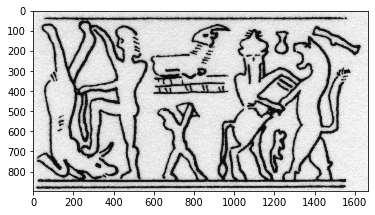

In [312]:
path = '/Users/atad/Desktop/DIGANES/pics'
image_name = 'Blocher 1992b,3.jpg.jpg'
plt.figure()

plt.imshow(io.imread(os.path.join(path, image_name)))